<div align=center style="font-weight:900;">Examen Introducción a la Programación para Ciencia de Datos</div>
<div align=center>(2024/2025)</div>
<br>
<div align=justify>Nota: No se puede utilizar ciclos explícitos ni funciones no vectorizadas en ningún ejercicio. De
hacerlo se anulará el ejercicio correspondiente. El examen se resuelve en papel. Adjunto a este
examen dispone de una cheat sheet con las funciones más utilizadas en R.</div>

In [2]:
# install.packages("tidyverse")
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.1     ✔ stringr   1.5.2
✔ ggplot2   4.0.0     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


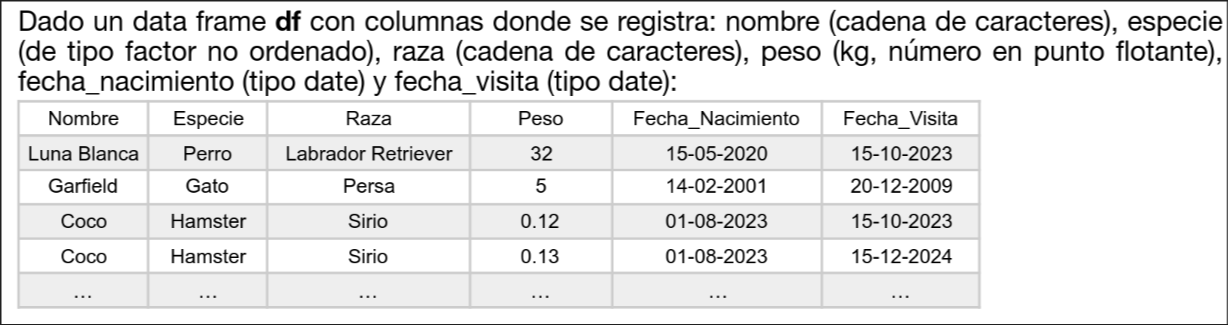

In [3]:
# Fijar semilla para reproducibilidad
set.seed(42)

# Crear un vector con nombres de mascotas
nombres <- c("Luna Blanca", "Garfield", "Coco", "Max", "Fido", "Rex", "Bella", "Simba", "Chester", "Rocky",
             "Milo", "Charlie", "Benny", "Daisy", "Zoe", "Oliver", "Lucy", "Toby", "Jake", "Nala", 
             "Coco", "Tommy", "Ruby", "Lucky", "Jack", "Sophie", "Shadow", "Chloe", "Ziggy", "Oreo")

# Crear un vector con especies
especies <- c("Perro", "Gato", "Hamster", "Conejo", "Ave")

# Crear un vector con razas (más razas añadidas)
razas <- c("Labrador Retriever", "Persa", "Sirio", "Bulldog", "Chihuahua", "Golden Retriever", "Poodle", "Siamés", 
           "Ragdoll", "Sphynx", "Beagle", "Pug", "Shih Tzu", "Yorkshire Terrier", "Cocker Spaniel", "Dachshund", 
           "Doberman", "Rottweiler", "Maine Coon", "Bengal", "Siberian Husky", "Jack Russell Terrier", 
           "British Shorthair", "Airedale Terrier", "Pit Bull", "Great Dane", "Husky", "Basset Hound", "Akita", 
           "Havanese", "Samoyed", "Australian Shepherd", "Maltese", "Scottish Terrier", "Shar Pei", "Rottweiler", 
           "Shiba Inu", "Collie", "Alaskan Malamute", "French Bulldog")

# Generar el tibble con 10,000 muestras
df <- tibble(
  nombre = sample(nombres, size = 10000, replace = TRUE),  # Selección aleatoria de nombres
  especie = factor(sample(especies, size = 10000, replace = TRUE), levels = c("Perro", "Gato", "Hamster", "Conejo", "Ave")),  # Aleatorio entre especies
  raza = sample(razas, size = 10000, replace = TRUE),  # Selección aleatoria de razas
  peso = round(runif(10000, 0.1, 50), 2),  # Peso aleatorio entre 0.1 y 50 kg
  fecha_nacimiento = as.Date('2000-01-01') + sample(0:9000, size = 10000, replace = TRUE),  # Fechas aleatorias de nacimiento
  fecha_visita = as.Date('2023-01-01') + sample(0:3650, size = 10000, replace = TRUE)  # Fechas aleatorias de visitas en los próximos 10 años
)

# Ver los primeros datos
head(df)


nombre,especie,raza,peso,fecha_nacimiento,fecha_visita
<chr>,<fct>,<chr>,<dbl>,<date>,<date>
Lucy,Conejo,Havanese,18.99,2023-01-11,2029-05-03
Fido,Perro,British Shorthair,12.38,2004-05-14,2024-09-06
Luna Blanca,Conejo,Dachshund,1.16,2012-07-06,2030-03-03
Jack,Perro,Basset Hound,23.27,2005-10-23,2024-02-28
Rocky,Conejo,British Shorthair,32.40,2021-01-19,2023-12-31
Max,Gato,British Shorthair,46.18,2006-12-19,2027-11-13


### **Ejercicio1**
Usando funciones del paquete tidyverse:

1. Identifica las 10 razas de perros más comunes entre las mascotas mayores a 5 años.


In [4]:
df %>%
  filter(especie == "Perro", ((today() - fecha_nacimiento) / 365) > 5) %>%
  group_by(raza) %>%
  summarise(counts = n()) %>%
  arrange(desc(counts)) %>%
  head(10)

raza,counts
<chr>,<int>
Rottweiler,84
British Shorthair,66
Maine Coon,58
Siamés,57
Yorkshire Terrier,53
Australian Shepherd,51
Chihuahua,50
Collie,50
Pit Bull,50


2. Encuentra la mascota más pesada de cada especie

In [5]:
df %>%
  group_by(especie) %>%
  filter(peso == max(peso))

nombre,especie,raza,peso,fecha_nacimiento,fecha_visita
<chr>,<fct>,<chr>,<dbl>,<date>,<date>
Lucy,Hamster,Doberman,49.97,2003-12-30,2029-07-17
Garfield,Ave,Siberian Husky,50.00,2023-11-11,2029-08-18
Coco,Perro,Maltese,49.99,2020-01-25,2031-01-21
Oliver,Conejo,Bulldog,50.00,2017-10-13,2028-09-25
Nala,Gato,French Bulldog,50.00,2010-08-04,2028-10-25


In [30]:
df %>%
  arrange(especie) %>%
  group_by(especie) %>%
  top_n(1, peso)

nombre,especie,raza,peso,fecha_nacimiento,fecha_visita
<chr>,<fct>,<chr>,<dbl>,<date>,<date>
Coco,Perro,Maltese,49.99,2020-01-25,2031-01-21
Nala,Gato,French Bulldog,50.00,2010-08-04,2028-10-25
Lucy,Hamster,Doberman,49.97,2003-12-30,2029-07-17
Oliver,Conejo,Bulldog,50.00,2017-10-13,2028-09-25
Garfield,Ave,Siberian Husky,50.00,2023-11-11,2029-08-18


### **Ejercicio2**
Utilizando el paquete de ggplot2, realice un gráfico de tarta que muestre el número
de visitas totales al veterinario por especie. Eliminar los nombres de los ejes.
<br>
<br>
<br>
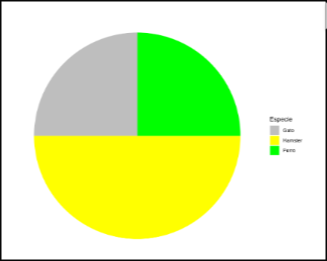

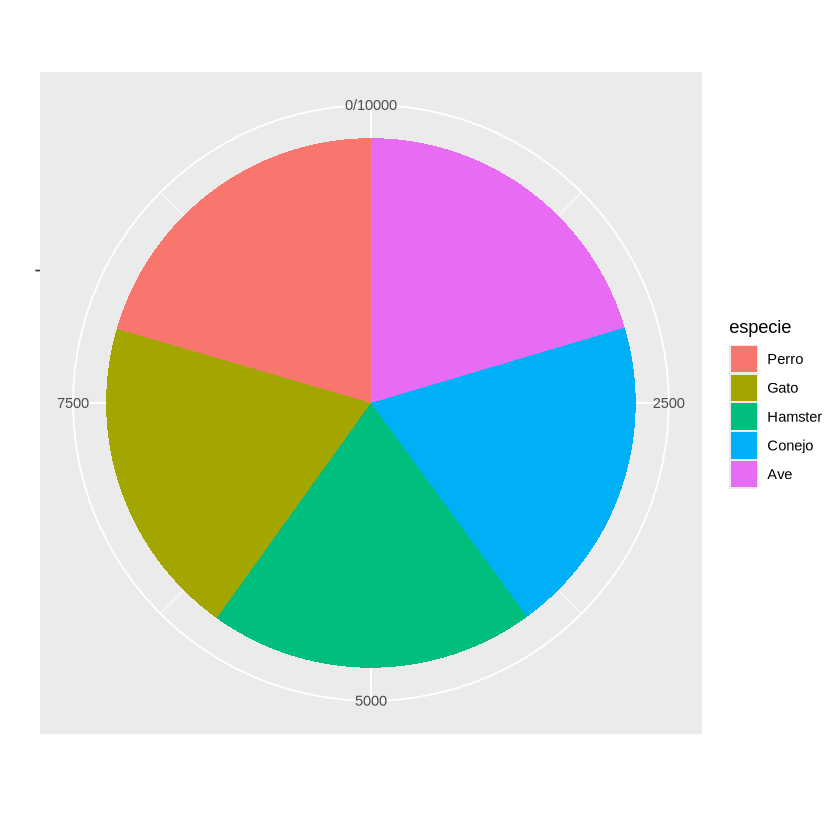

In [7]:
df %>%
  group_by(especie) %>%
  summarise(nVisitas = n()) %>%
  ggplot(aes(x = "", y = nVisitas, fill = especie)) +
  geom_bar(stat = "identity") +
  coord_polar("y") +
  labs(x = "", y = "")

In [8]:
df %>%
  group_by(especie) %>%
  summarise(nVisitas = n()/nrow(df))

especie,nVisitas
<fct>,<dbl>
Perro,0.2048
Gato,0.1962
Hamster,0.1994
Conejo,0.1955
Ave,0.2041


### **Ejercicio3**
Construya una lista que contenga por cada fecha de visita que mascotas han
visitado al veterinario en orden alfabético.
<br>
<br>
<br>
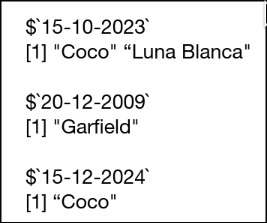

In [9]:
x <- lapply(
  unique(df$fecha_visita),
  function(fecha) {
    sort(df[df$fecha_visita == fecha,]$nombre)
  }
)
names(x) <- unique(df$fecha_visita)
x[1:10]


$`2029-05-03`
[1] "Jake"  "Lucy"  "Ziggy"

$`2024-09-06`
[1] "Fido"   "Nala"   "Oliver" "Rex"    "Rocky"  "Sophie"

$`2030-03-03`
[1] "Charlie"     "Daisy"       "Luna Blanca" "Oliver"      "Rocky"      
[6] "Ziggy"      

$`2024-02-28`
[1] "Jack"  "Oreo"  "Rocky" "Zoe"  

$`2023-12-31`
[1] "Benny" "Jake"  "Milo"  "Rocky" "Zoe"  

$`2027-11-13`
[1] "Chester" "Jake"    "Max"     "Sophie" 

$`2029-06-05`
[1] "Shadow" "Sophie" "Toby"  

$`2024-12-24`
[1] "Coco"   "Sophie" "Ziggy" 

$`2024-05-28`
[1] "Coco" "Lucy"

$`2030-01-08`
[1] "Chester" "Jack"    "Toby"    "Zoe"

### **Ejercicio4**
Utilizando funciones del paquete de stringr, agregar al data frame una nueva
columna de tipo numérica que indique cuantas vocales hay en el nombre de la mascota
(independientemente si es mayúscula o minúscula) y otra columna de tipo lógico que indique
si el nombre es compuesto. Mostrar solo las columnas nuevas y la del nombre
<br>
<br>
<br>
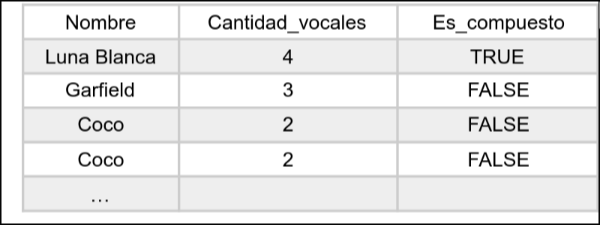

In [10]:
df %>%
  select(nombre) %>%
  mutate(
    cantidad_vocales = str_count(str_to_lower(nombre), "[aeiou]"),
    es_compuesto = str_detect(nombre, " ")
  )

nombre,cantidad_vocales,es_compuesto
<chr>,<int>,<lgl>
Lucy,1,FALSE
Fido,2,FALSE
Luna Blanca,4,TRUE
Jack,1,FALSE
Rocky,1,FALSE
Max,1,FALSE
Toby,1,FALSE
Sophie,3,FALSE
Lucy,1,FALSE
